<a href="https://colab.research.google.com/github/natalfr17/An-lise-Estat-stica-de-Dados-e-Informa-es/blob/main/Prova_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUESTÃO 3**

Esta questão aborda a aplicação prática de um problema de ANOVA (Análise de Variância) utilizando dados reais empregados em contextos empresariais. O objetivo é analisar as médias de quantidades e preços de produtos agrupados por países, utilizando o conjunto de dados Vendas de Varejo Online. Siga os passos abaixo para desenvolver sua solução

# **a) Análise Descritiva**

foi realizada uma inspeção geral da estrutura do DataFrame, onde se verificou a presença de valores ausentes nas colunas Description e Customer ID. Registros com essas ausências foram removidos, e o conjunto foi filtrado para conter apenas países com pelo menos 500 transações, a fim de garantir robustez estatística.

Em seguida, foram calculadas as médias de quantidade e preço por país, seguidas de visualizações com boxplots para evidenciar a dispersão e presença de outliers.

In [41]:
# pip install pingouin

In [40]:
# Importar bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import pingouin as pg

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathchi/online-retail-ii-data-set-from-ml-repository")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/online-retail-ii-data-set-from-ml-repository


In [4]:
# Ler base em xlsx
import glob
xlsx_files = glob.glob(path + '/*.xlsx')

if xlsx_files:
    # Assuming there's only one xlsx file or the first one is the correct one
    df = pd.read_excel(xlsx_files[0])
    print(f"Successfully loaded data from: {xlsx_files[0]}")
else:
    print("No .xlsx files found in the directory.")

Successfully loaded data from: /kaggle/input/online-retail-ii-data-set-from-ml-repository/online_retail_II.xlsx


In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [14]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Netherlands', 'Spain', 'Channel Islands',
       'Italy', 'Cyprus', 'Greece', 'Austria', 'Sweden', 'Switzerland'],
      dtype=object)

In [8]:
# Verificando dados ausentes

df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [9]:
# Removendo registros inválidos

df = df.dropna(subset=['Customer ID', 'Description'])

# Filtrando apenas países com pelo menos 500 transações

country_counts = df['Country'].value_counts()
top_countries = country_counts[country_counts >= 500].index
df = df[df['Country'].isin(top_countries)]

In [10]:
# Estatísticas descritivas por país

df_grouped = df.groupby('Country')[['Quantity', 'Price']].mean().sort_values(by='Quantity', ascending=False)
df_grouped.head()

,Quantity,Price
Country,,
Netherlands,65.663778,3.311910
Sweden,59.003398,7.689287
Australia,30.662080,6.202324
EIRE,20.326521,8.200480
Switzerland,18.578770,4.411281


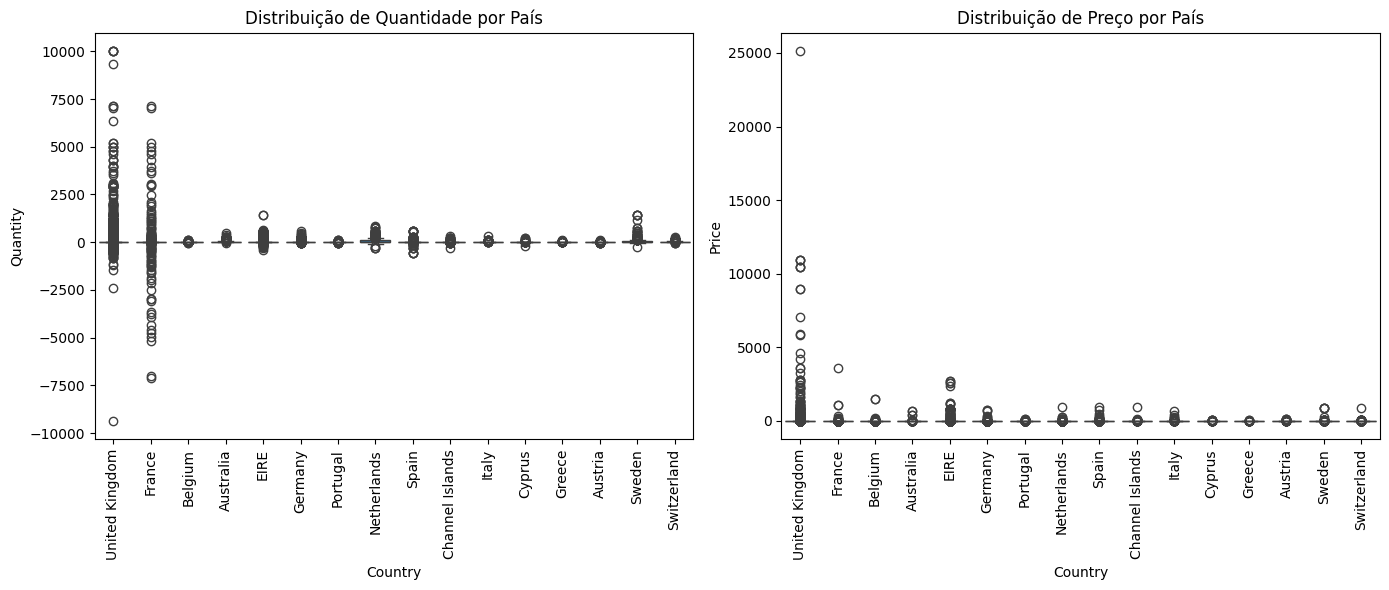

In [11]:
# Boxplots para visualização
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Country', y='Quantity', data=df)
plt.xticks(rotation=90)
plt.title('Distribuição de Quantidade por País')

plt.subplot(1, 2, 2)
sns.boxplot(x='Country', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Distribuição de Preço por País')

plt.tight_layout()
plt.show()

3.b

In [31]:
# ANOVA com todos os países
model_quantity = ols('Quantity ~ C(Country)', data=df).fit()
anova_table_quantity = sm.stats.anova_lm(model_quantity, typ=2)
print("\n--- ANOVA para Quantidade por País ---")
print(anova_table_quantity)
p_value_quantity = anova_table_quantity['PR(>F)'][0]
print(f"P-valor da Quantidade: {p_value_quantity:.4f}")
if p_value_quantity < 0.05:
    print("Diferença significativa nas médias de Quantidade entre países.")
else:
    print("Nenhuma diferença significativa nas médias de Quantidade entre países.")


--- ANOVA para Quantidade por País ---
                  sum_sq        df           F  PR(>F)
C(Country)  1.093949e+07      15.0  119.353329     0.0
Residual    2.530021e+09  414050.0         NaN     NaN
P-valor da Quantidade: 0.0000
Diferença significativa nas médias de Quantidade entre países.


/tmp/ipython-input-31-4019171794.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_quantity = anova_table_quantity['PR(>F)'][0]


In [33]:
    # ANOVA para Preço Unitário
    model_price = ols('Price ~ C(Country)', data=df).fit()
    anova_table_price = sm.stats.anova_lm(model_price, typ=2)
    print("\n--- ANOVA para Preço Unitário por País ---")
    print(anova_table_price)
    p_value_price = anova_table_price['PR(>F)'][0]
    print(f"P-valor do Preço: {p_value_price:.4f}")
    if p_value_price < 0.05:
        print("Diferença significativa nas médias de Preço entre países.")
    else:
        print("Nenhuma diferença significativa nas médias de Preço entre países.")



--- ANOVA para Preço Unitário por País ---
                  sum_sq        df         F    PR(>F)
C(Country)  2.222567e+05      15.0  3.271158  0.000017
Residual    1.875491e+09  414050.0       NaN       NaN
P-valor do Preço: 0.0000
Diferença significativa nas médias de Preço entre países.


/tmp/ipython-input-33-3719702711.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_price = anova_table_price['PR(>F)'][0]


c)

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 414066.
  res = hypotest_fun_out(*samples, **kwds)



Shapiro-Wilk (Quantidade): p-valor=0.0000


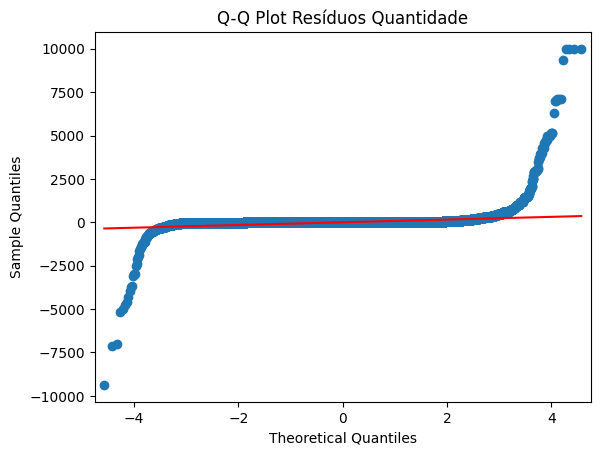

In [34]:
# 5. Verificação de Pressupostos (Normalidade e Homocedasticidade)

# Normalidade dos Resíduos (para Quantidade)
shapiro_quantity_res = stats.shapiro(model_quantity.resid)
print(f"\nShapiro-Wilk (Quantidade): p-valor={shapiro_quantity_res[1]:.4f}")
sm.qqplot(model_quantity.resid, line='s')
plt.title('Q-Q Plot Resíduos Quantidade')
plt.show()

Shapiro-Wilk (Preço Unitário): p-valor=0.0000


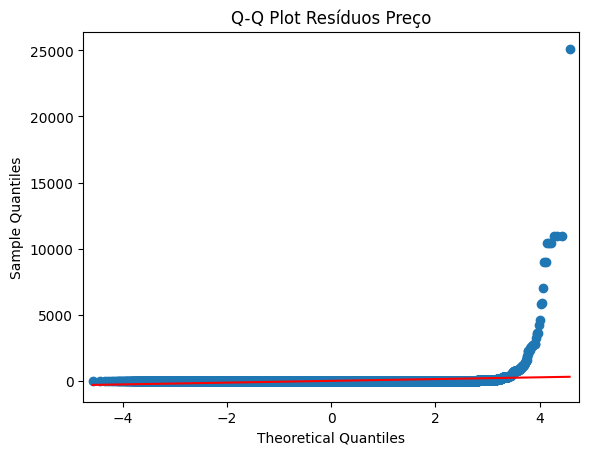

In [35]:
# Normalidade dos Resíduos para Preço
shapiro_price_res = stats.shapiro(model_price.resid)
print(f"Shapiro-Wilk (Preço Unitário): p-valor={shapiro_price_res[1]:.4f}")
sm.qqplot(model_price.resid, line='s')
plt.title('Q-Q Plot Resíduos Preço')
plt.show()

In [43]:
# Homocedasticidade (Teste de Levene para Quantidade)
levene_quantity_res = pg.homoscedasticity(data=df, dv='Quantity', group='Country', method='levene')
print(f"\nTeste de Levene (Quantidade): p-valor={levene_quantity_res['pval'].values[0]:.4f}")


Teste de Levene (Quantidade): p-valor=0.0000


In [46]:
# Homocedasticidade (Teste de Levene para Preço Unitário)
levene_price_res = pg.homoscedasticity(data=df, dv='Price', group='Country', method='levene')
print(f"Teste de Levene (Preço Unitário): p-valor={levene_price_res['pval'].values[0]:.4f}")


Teste de Levene (Preço Unitário): p-valor=0.0000


In [48]:
# 6. Interpretação e Tomada de Decisão
print("\n--- Interpretação e Decisões Estratégicas ---")
if p_value_quantity < 0.05:
     print("Quantidade: Diferenças significativas nas médias entre países. Ajustar estoque/logística por região é recomendado.")
else:
     print("Quantidade: Nenhuma diferença significativa nas médias. Estoque/logística podem ser mais padronizados.")

if p_value_price < 0.05:
     print("Preço Unitário: Diferenças significativas nas médias entre países. Considere precificação adaptada ao mercado local.")
else:
    print("Preço Unitário: Nenhuma diferença significativa nas médias. Política de preços unificada pode ser mantida.")

print("\nSugestão: Se pressupostos não atendidos, considere transformações (log) ou Welch ANOVA.")

print("\nAnálise concluída.")


--- Interpretação e Decisões Estratégicas ---
Quantidade: Diferenças significativas nas médias entre países. Ajustar estoque/logística por região é recomendado.
Preço Unitário: Diferenças significativas nas médias entre países. Considere precificação adaptada ao mercado local.

Sugestão: Se pressupostos não atendidos, considere transformações (log) ou Welch ANOVA.

Análise concluída.
